# Lab 10 - Task

## Travelling on vacations to Romania

# Problem:
Implement the best-first search algorithm on the map such that for any given city, it 
should return the shortest distance from that city to Bucharest using the heuristic based on bestfirst search algorithm

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue


In [2]:
G = nx.Graph()

G.add_nodes_from(["Arad", "Bucharest","Oradea","Zerind","Sibiu","Timisoara","Lugoj","Mahadia","Dobreta","Rimnicu Vilcea","Craiova","Pitesti","Fagaras","Giurgiu","Urziceni","Hirsova","Eforie","Vaslui","Iasi","Neamt"]) #add remaining nodes to the list

In [3]:
edges = [("Arad", "Zerind", 75),("Arad", "Sibiu", 140),("Arad", "Timisoara", 118),("Bucharest", "Fagaras", 211),("Bucharest", "Urziceni",85),("Bucharest", "Giurgiu",90),("Bucharest", "Pitesti",101),("Craiova", "Dobreta",120),("Craiova", "Pitesti",138),("Craiova","Rimnicu Vilcea", 146),("Dobreta", "Mehadia", 75),("Eforie", "Hirsova", 86),("Fagaras", "Sibiu", 99),
("Hirsova", "Urziceni", 98),("Iasi", "Neamt", 87),("Iasi", "Vaslui", 92),("Lugoj", "Mehadia", 70),("Lugoj", "Timisoara",111),("Oradea", "Zerind", 71),("Oradea", "Sibiu", 151),("Pitesti", "Rimnicu Vilcea", 97),("Rimnicu Vilcea", "Sibiu",80),("Urziceni", "Vaslui",142)] #add remaining edges to the list

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

In [4]:
# Set node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)


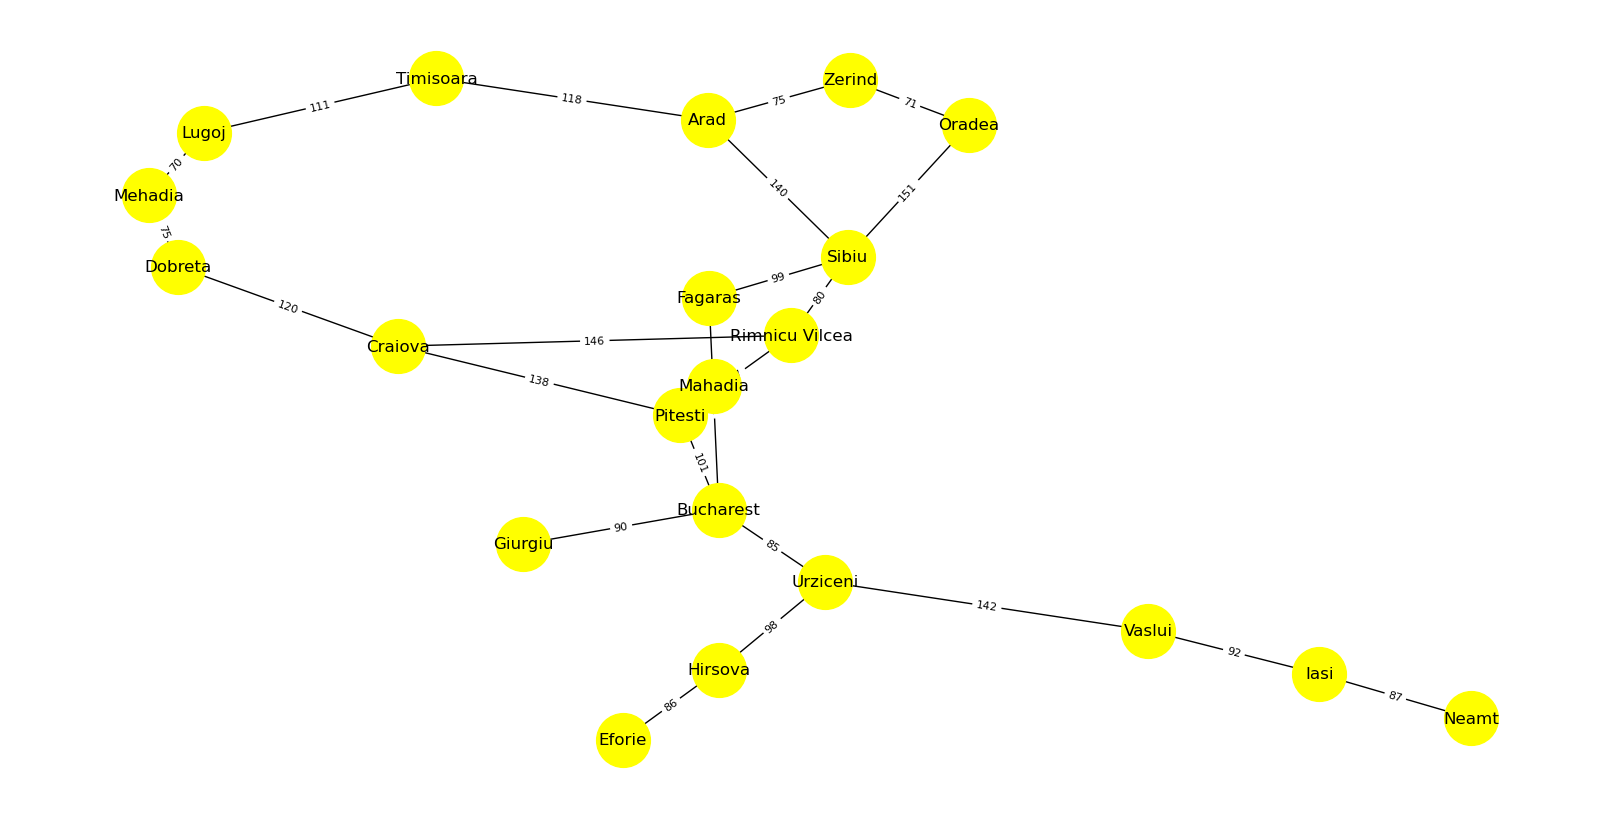

In [5]:
# Draw graph with labels and edge weights
plt.figure(figsize=(16, 8))
nx.draw(G, pos, with_labels=True, font_size=12, node_size= 1500, node_color ="yellow")

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

In [10]:
Heuristic_Values = {"Arad" : 366, "Bucharest":0,"Oradea":380,"Zerind":374,"Sibiu":253,"Timisoara":329,"Lugoj":244,"Mahadia":241,"Dobreta":242,"Rimnicu Vilcea":193,"Craiova":160,"Pitesti":100,"Fagaras":176,"Giurgiu": 77,"Urziceni":80,"Hirsova":151,"Eforie":161,"Vaslui":199,"Iasi":226,"Neamt":234}

Heuristic_Values

{'Arad': 366,
 'Bucharest': 0,
 'Oradea': 380,
 'Zerind': 374,
 'Sibiu': 253,
 'Timisoara': 329,
 'Lugoj': 244,
 'Mahadia': 241,
 'Dobreta': 242,
 'Rimnicu Vilcea': 193,
 'Craiova': 160,
 'Pitesti': 100,
 'Fagaras': 176,
 'Giurgiu': 77,
 'Urziceni': 80,
 'Hirsova': 151,
 'Eforie': 161,
 'Vaslui': 199,
 'Iasi': 226,
 'Neamt': 234}

In [11]:
PQ = PriorityQueue()

starting = "Arad"
goal = "Bucharest"

visited = []
closed = []

PQ.put((Heuristic_Values[starting],starting))

while PQ.empty() == False:
    
    n = PQ.get()
    
    h = n[0]
    city = n[1]
    
    closed.append(city)
    visited.append(city)
    
    successors = [i for i in G.neighbors( city)]
    
    if goal in successors:
        
        visited.append(goal)
        cost = nx.path_weight(G, visited, "weight")
        print("Goal city:", goal, "reached.")
        print("Visited cities:", visited)
        print("Cost = ", cost)
        break
        
    successor_queue = PriorityQueue()
    
    for i in successors:
        successor_queue.put((Heuristic_Values[i], i))
    
    for i in successors:
        s = successor_queue.get()
        if s not in closed and s not in visited:
            PQ.put(s)
            break

Goal city: Bucharest reached.
Visited cities: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Cost =  450
